In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential

In [3]:
df=pd.read_csv(r'E:\DiseasesDiagnosis\notebook\final.csv')

In [4]:
df.head()

,Unnamed: 0,Patient_ID,Gender,Date_of_Birth,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Temperature (Celsius),Oxygen Saturation,Glucose Level,Cholesterol Level,Diagnosis Code,Diagnosis,Age
0,0,1,Male,2006-05-05,144,72,106,26,37.3,86%,90,237,51881,Acute Respiratory Failure,18
1,1,2,Female,1949-08-02,95,65,102,26,37.4,93%,141,176,4019,Hypertension,75
2,2,3,Male,1996-08-18,173,112,60,20,36.8,94%,139,226,4100,Coronary Artery Disease,28
3,3,4,Male,1982-06-10,139,69,54,19,37.0,98%,150,180,4100,Coronary Artery Disease,42
4,4,5,Male,1956-01-14,173,85,83,19,36.7,97%,109,291,41401,Chronic Ischemic Heart Disease,69


In [5]:
df.drop(['Unnamed: 0','Date_of_Birth','Patient_ID'],axis=1,inplace=True)

In [6]:
df.head()

,Gender,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Temperature (Celsius),Oxygen Saturation,Glucose Level,Cholesterol Level,Diagnosis Code,Diagnosis,Age
0,Male,144,72,106,26,37.3,86%,90,237,51881,Acute Respiratory Failure,18
1,Female,95,65,102,26,37.4,93%,141,176,4019,Hypertension,75
2,Male,173,112,60,20,36.8,94%,139,226,4100,Coronary Artery Disease,28
3,Male,139,69,54,19,37.0,98%,150,180,4100,Coronary Artery Disease,42
4,Male,173,85,83,19,36.7,97%,109,291,41401,Chronic Ischemic Heart Disease,69


In [7]:
df['Oxygen Saturation']=df['Oxygen Saturation'].str.replace('%','').astype(int)

In [8]:
df.head()

,Gender,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Temperature (Celsius),Oxygen Saturation,Glucose Level,Cholesterol Level,Diagnosis Code,Diagnosis,Age
0,Male,144,72,106,26,37.3,86,90,237,51881,Acute Respiratory Failure,18
1,Female,95,65,102,26,37.4,93,141,176,4019,Hypertension,75
2,Male,173,112,60,20,36.8,94,139,226,4100,Coronary Artery Disease,28
3,Male,139,69,54,19,37.0,98,150,180,4100,Coronary Artery Disease,42
4,Male,173,85,83,19,36.7,97,109,291,41401,Chronic Ischemic Heart Disease,69


In [9]:
df.dtypes

Gender                         object
Blood Pressure (systolic)       int64
Blood Pressure (diastolic)      int64
Heart Rate                      int64
Respiratory Rate                int64
Temperature (Celsius)         float64
Oxygen Saturation               int32
Glucose Level                   int64
Cholesterol Level               int64
Diagnosis Code                  int64
Diagnosis                      object
Age                             int64
dtype: object

In [10]:
X=df.drop(['Diagnosis'],axis=1)
y=df['Diagnosis']

In [11]:
categorical_col=X.shape

In [12]:
# categorical_column=['Gender']
# numerical_column=['Blood_Pressure_systolic',
#  'Blood_Pressure_diastolic',
#  'Heart_Rate',
#  'Respiratory_Rate',
#  'Temperature_Celsius',
#  'Glucose_Level',
#  'Cholesterol_Level',
#  'Diagnosis_Code',
#  'Age',
#  'Oxygen_Saturation']

In [13]:
numerical_col=pd.DataFrame(X.select_dtypes(exclude='object')).columns.tolist()
categorical_col=pd.DataFrame(X.select_dtypes(include='object')).columns.tolist()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [15]:
## Numerical pipeline:
num_pipeline=Pipeline(
    steps=[
        ('Imputer',SimpleImputer(strategy='median')),
        ('Scaler',StandardScaler())
    ]
)

## Categorical Pipeline:
cat_pipeline = Pipeline(
    steps=[
        ('Imputer', SimpleImputer(strategy='most_frequent')),
        ('Encoder', OneHotEncoder(handle_unknown='ignore')),
        ('Scaler', StandardScaler(with_mean=False))  # with_mean=False because one-hot encoded data is sparse
    ]
)


In [16]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_col),
    ('cat_pipeline',cat_pipeline,categorical_col)
])

In [17]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['Blood Pressure (systolic)',
                                  'Blood Pressure (diastolic)', 'Heart Rate',
                                  'Respiratory Rate', 'Temperature (Celsius)',
                                  'Oxygen Saturation', 'Glucose Level',
                                  'Cholesterol Level', 'Diagnosis Code',
                                  'Age']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('Scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['Gender'])])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800000, 11), (200000, 11), (800000,), (200000,))

In [21]:
x_train=preprocessor.fit_transform(X_train)
x_test=preprocessor.transform(X_test)

In [22]:
x_train=pd.DataFrame(x_train,columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(x_test,columns=preprocessor.get_feature_names_out())

In [23]:
x_train.shape[1]

12

In [24]:
y.value_counts()

Diagnosis
Acute Respiratory Failure         100489
Chronic Ischemic Heart Disease    100392
Asthma                            100301
Stroke                            100021
Heart Failure                      99917
Hypertension                       99887
Coronary Artery Disease            99869
Diabetes Mellitus                  99746
Syncope and Collapse               99724
Chronic Kidney Disease             99654
Name: count, dtype: int64

In [38]:
model=Sequential()
model.add(Dense(300,activation='relu',input_shape=(x_train.shape[1],), name='Inputlayer'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu',name='Firstlayer'))
model.add(BatchNormalization())
model.add(Dense(100,activation='relu',name='Secondlayer'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu',name='Thirdlayer'))
model.add(Dense(10,activation='softmax',name='outputlayer'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputlayer (Dense)              │ (None, 300)            │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Firstlayer (Dense)              │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Secondlayer (Dense)             │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Thirdlayer (Dense)              │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,760 (358.44 KB)

 Trainable params: 90,760 (354.53 KB)

 Non-trainable params: 1,000 (3.91 KB)

In [27]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
encoder=LabelEncoder()

In [29]:
y_train=encoder.fit_transform(Y_train)
y_test=encoder.transform(Y_test)

In [30]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [31]:
callback=EarlyStopping(monitor='accuracy',patience=10)

In [32]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=256,callbacks=callback)

Epoch 1/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.6427 - loss: 0.8289 - val_accuracy: 0.7075 - val_loss: 0.7284
Epoch 2/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8540 - loss: 0.2887 - val_accuracy: 0.9098 - val_loss: 0.1932
Epoch 3/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8749 - loss: 0.2527 - val_accuracy: 0.9260 - val_loss: 0.1696
Epoch 4/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.9059 - loss: 0.1973 - val_accuracy: 0.9803 - val_loss: 0.1045
Epoch 5/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9218 - loss: 0.1688 - val_accuracy: 0.9586 - val_loss: 0.1049
Epoch 6/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9299 - loss: 0.1532 - val_accuracy: 0.9940 - val_loss: 0.0758
Epoch 7/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9362 - loss: 0.1423 - val_accuracy: 0.9555 - val_loss: 0.1012
Epoch 8/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9419 -

In [33]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.768864,0.495350,0.707550,0.728441
1,0.860181,0.277402,0.909790,0.193165
2,0.884926,0.235716,0.925965,0.169555
3,0.909960,0.190426,0.980320,0.104495
4,0.924092,0.164268,0.958580,0.104907
...,...,...,...,...
91,0.995281,0.013949,0.851815,0.440265
92,0.995674,0.012903,0.881450,0.382383
93,0.995620,0.013251,0.894050,0.359677
94,0.995874,0.012821,0.894035,0.488178


<Axes: >

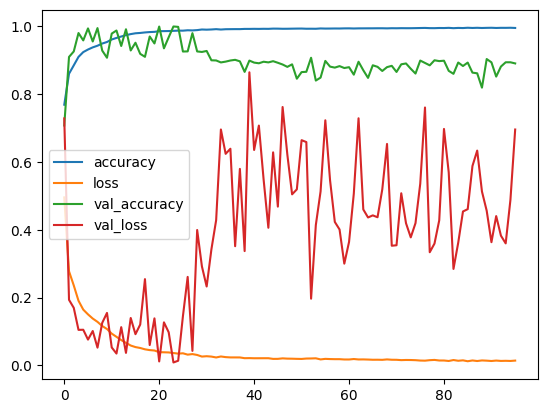

In [34]:
pd.DataFrame(history.history).plot()

In [36]:
model.get_metrics_result()

{'accuracy': 0.8906800150871277, 'loss': 0.6956707835197449}